In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("accidents.csv")


In [3]:
print("First 5 rows:")
display(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


First 5 rows:


,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month   

## Basic Preprocessing



In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

In [6]:
# Fill missing categorical values with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\1559860186.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Exploratory Data Analysis (EDA)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\2249192448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Weather Conditions", order=df["Weather Conditions"].value_counts().index, palette="Set2")


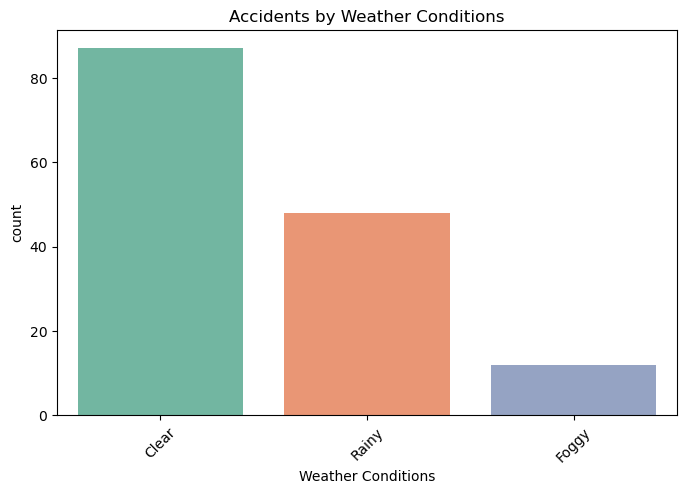

In [8]:

# 1. Accidents by Weather Condition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Weather Conditions", order=df["Weather Conditions"].value_counts().index, palette="Set2")
plt.title("Accidents by Weather Conditions")
plt.xticks(rotation=45)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\434742881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Road Conditions", order=df["Road Conditions"].value_counts().index, palette="Set3")


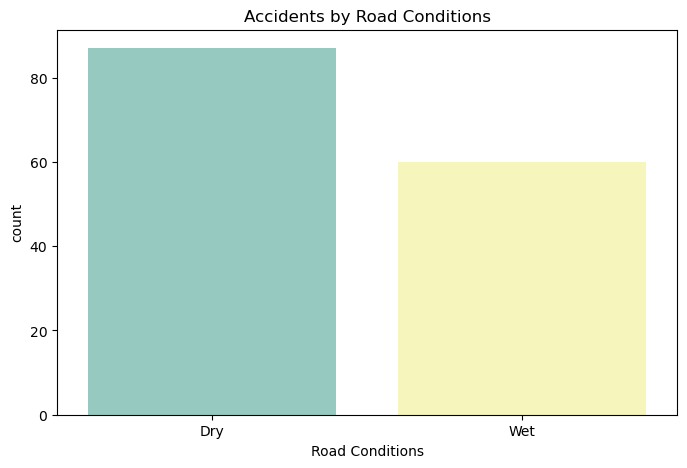

In [9]:

# 2. Accidents by Road Condition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Road Conditions", order=df["Road Conditions"].value_counts().index, palette="Set3")
plt.title("Accidents by Road Conditions")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\424678840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Time of Day", order=["Morning","Afternoon","Evening","Night"], palette="coolwarm")


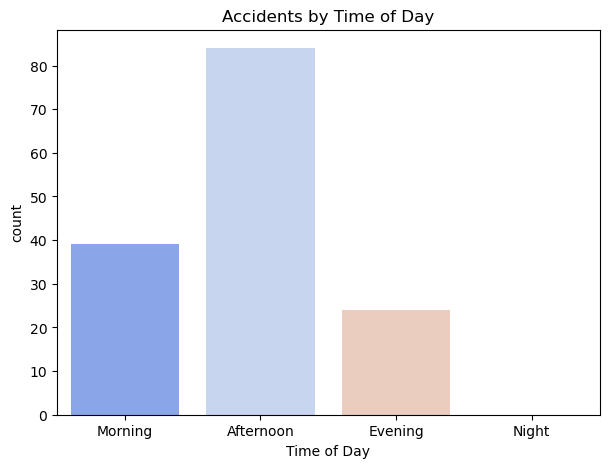

In [10]:
# 3. Accidents by Time of Day (Morning, Afternoon, Evening, Night)
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").apply(lambda x: x.hour if pd.notnull(x) else None)
df["Time of Day"] = pd.cut(df["Hour"], bins=[0,6,12,18,24], labels=["Night","Morning","Afternoon","Evening"], right=False)

plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Time of Day", order=["Morning","Afternoon","Evening","Night"], palette="coolwarm")
plt.title("Accidents by Time of Day")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\2371029514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Location Description", order=df["Location Description"].value_counts().head(5).index, palette="Paired")


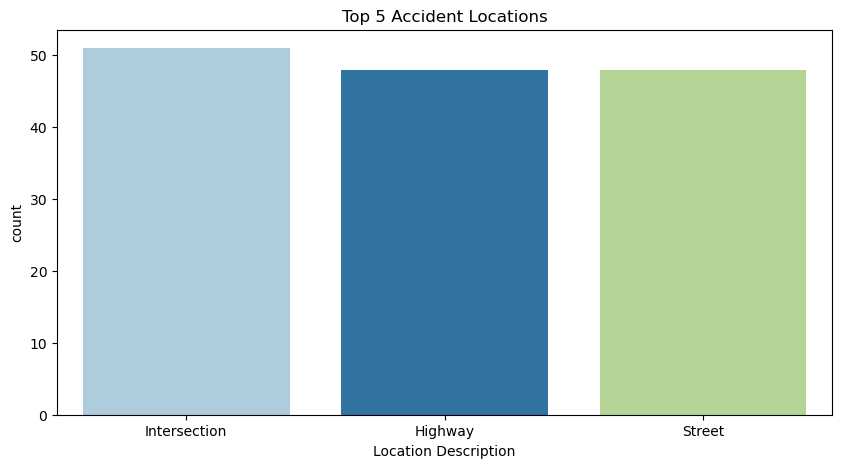

In [11]:
# 4. Accident Hotspots (Top Locations)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Location Description", order=df["Location Description"].value_counts().head(5).index, palette="Paired")
plt.title("Top 5 Accident Locations")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\3156166760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Injury Severity", order=df["Injury Severity"].value_counts().index, palette="Set1")


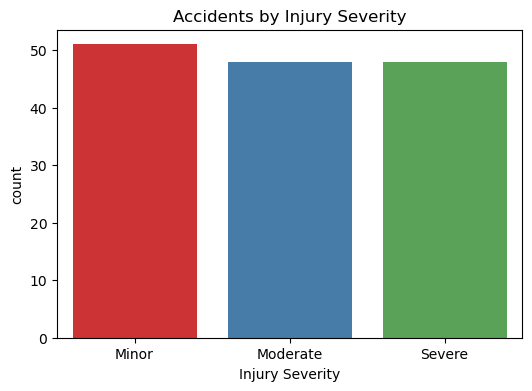

In [12]:
# 5. Injury Severity Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Injury Severity", order=df["Injury Severity"].value_counts().index, palette="Set1")
plt.title("Accidents by Injury Severity")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29020\3800417044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Contributing Factors", order=df["Contributing Factors"].value_counts().index, palette="Dark2")


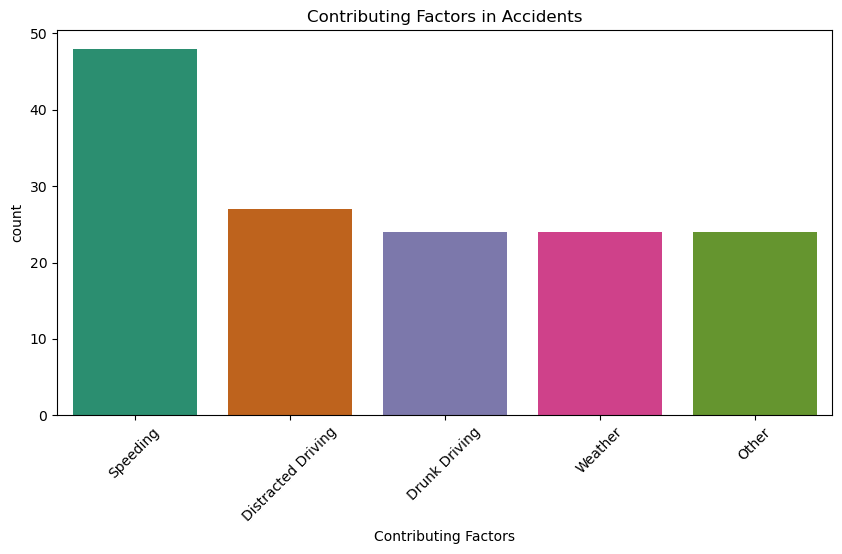

In [13]:

# 6. Contributing Factors
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Contributing Factors", order=df["Contributing Factors"].value_counts().index, palette="Dark2")
plt.title("Contributing Factors in Accidents")
plt.xticks(rotation=45)
plt.show()

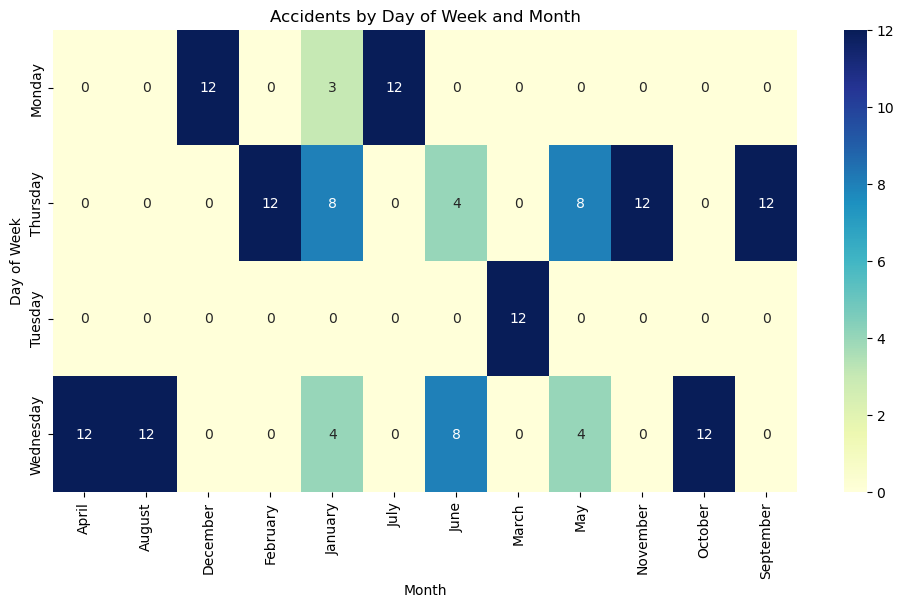

In [14]:
# 7. Heatmap - Accidents by Day of Week & Month
heatmap_data = df.groupby(["Day of Week","Month"]).size().unstack(fill_value=0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Accidents by Day of Week and Month")
plt.show()